# Q1
## Notebook created, Analysis and Visualization Libraries Imported

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing Path
path = r"C:\Users\abiya\01-2023 Instacart Basket Analysis"

In [3]:
# Importing the most updated dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_merged_all.pkl'))

In [5]:
df_ords_prods_all.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,0,0,2539329,1,prior,1,2,8,11.114836,196,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,prior,2,3,7,15.000000,196,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2,473747,1,prior,3,3,12,21.000000,196,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,3,3,2254736,1,prior,4,4,7,29.000000,196,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,4,4,431534,1,prior,5,4,15,28.000000,196,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0.1            int64   
 1   Unnamed: 0              int64   
 2   order_id                int64   
 3   user_id                 int64   
 4   eval_set                object  
 5   order_number            int64   
 6   order_dow               int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   product_id              int64   
 10  add_to_cart_order       int64   
 11  reordered               int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  _merge                  category
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

In [8]:
df_ords_prods_all.shape

(32434212, 34)

# Q2
## Creating the expected charts

<AxesSubplot:>

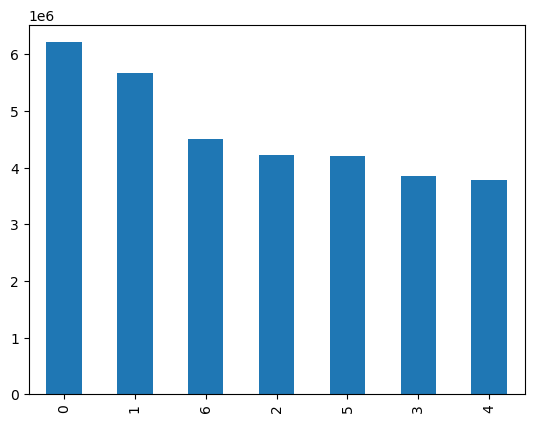

In [37]:
# creating  bar charts
df_ords_prods_all['order_dow'].value_counts().plot.bar()

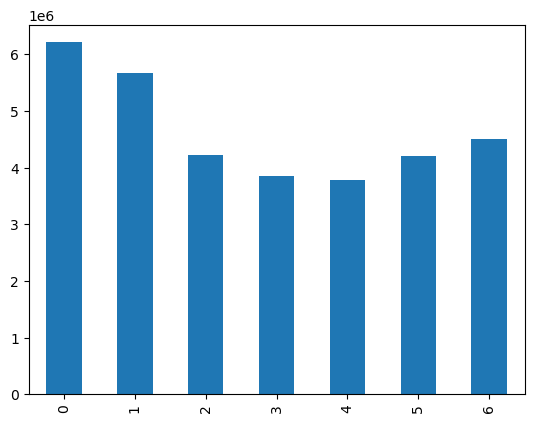

In [38]:
# Sorting the bar chart
bar_ords_week = df_ords_prods_all['order_dow'].value_counts().sort_index().plot.bar()


## Creating a histogram

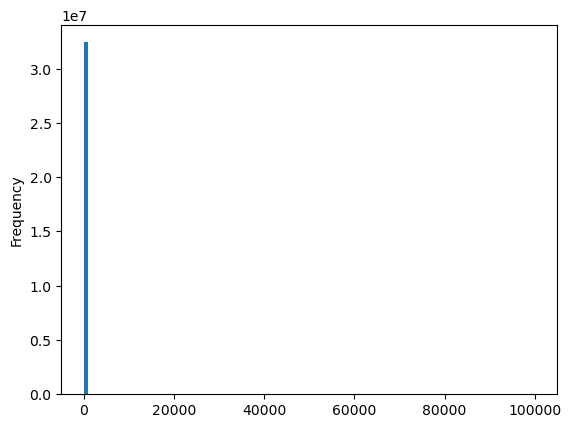

In [10]:
# Creating a histogram for prices
hist_prices = df_ords_prods_all['prices'].plot.hist(bins = 100)

In [14]:
df_ords_prods_all['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
df_ords_prods_all.loc[df_ords_prods_all['prices'] >100, 'prices'] = np.nan

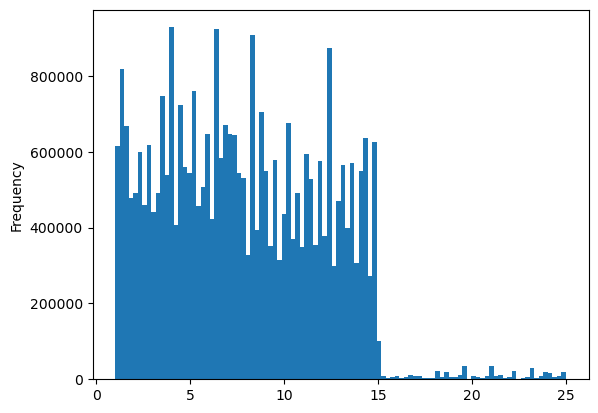

In [16]:
# Creating a histogram for prices after fising the outlier issue
hist_prices = df_ords_prods_all['prices'].plot.hist(bins = 100)

## Creating a scatterplot

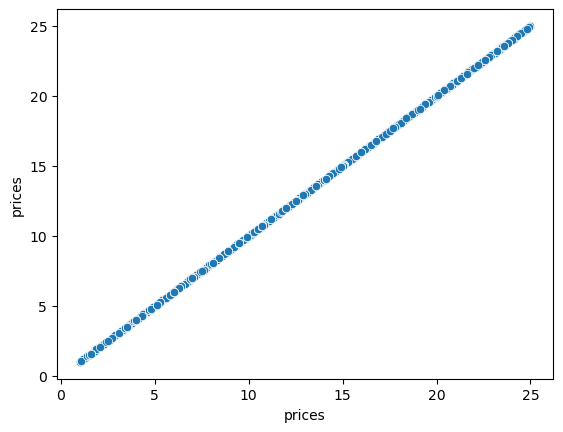

In [18]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)

## Creating sampling for the line chart

In [19]:
# Create a list holding true/false values to test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7
dev

array([False,  True, False, ..., False,  True,  True])

In [20]:
# Store 70 % of the sample in dataframe big
big = df_ords_prods_all[dev]

In [21]:
# Store 30 % of the sample in dataframe small
small = df_ords_prods_all[~dev]

In [22]:
# Checking partition
len(df_ords_prods_all)

32434212

In [23]:
# Checking partition by adding both samples
len(big) + len(small)

32434212

In [27]:
# creating a subset data frame for our line chart
df_order_price = small[['order_dow','prices']]

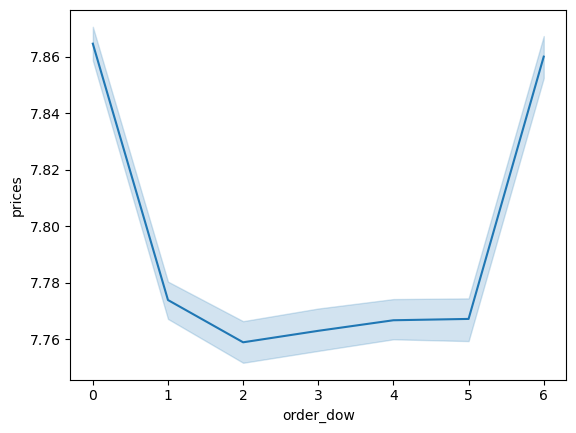

In [28]:
# creating a line chart
line_chart_week_prices = sns.lineplot(data = df_order_price, x = 'order_dow',y = 'prices')

# Q3
## Describing findings

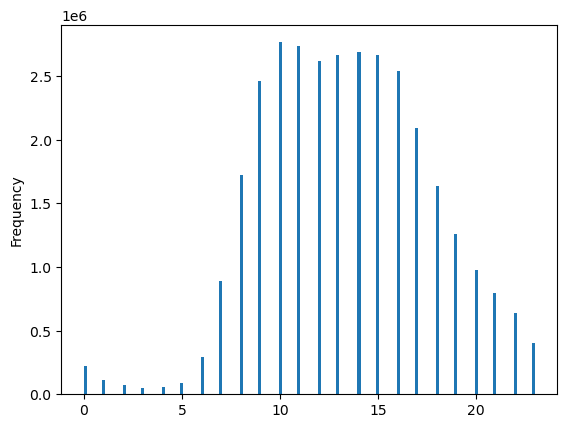

In [26]:
hist_order_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 150)

# Q4
## Creating a bar chart from the “loyalty_flag” column


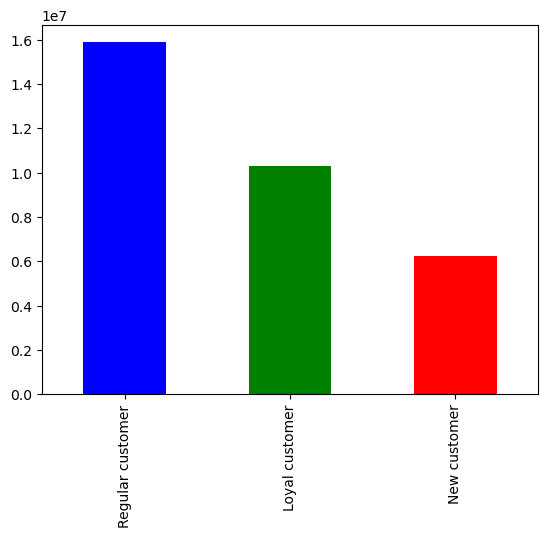

In [46]:
barchart_loyalty_customers = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'green', 'red'])

# Q5
## Checking whether there’s a difference in expenditure

In [24]:
# creating a line chart. For this first we need a subset df
df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [25]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


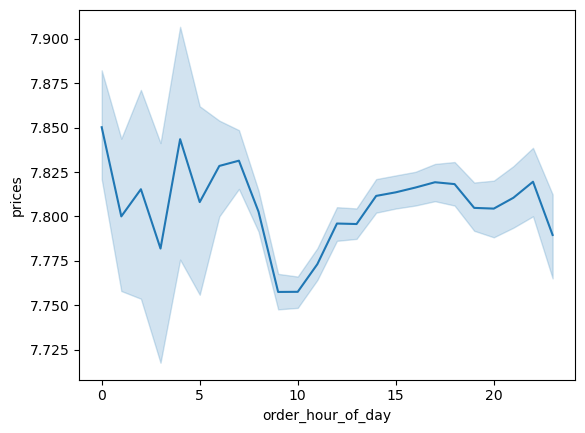

In [26]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

# Q6
## Exploratory analysis of customer demographics

In [29]:
#creating subset for the line chart 
df_age_dependants = small[['age','number_dependants']]

In [30]:
df_age_dependants.head()

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


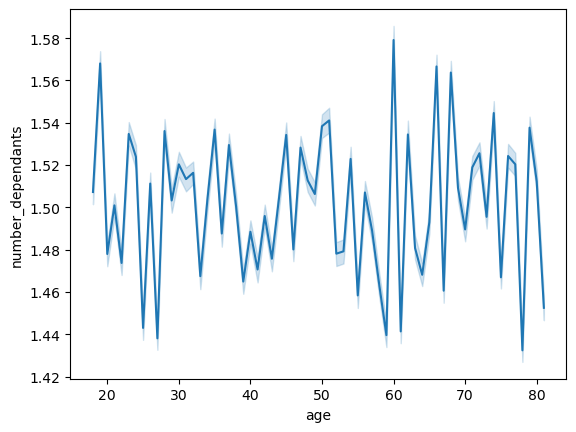

In [31]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

# Q7
## Exploring whether there’s a connection between age and spending power

In [32]:
# defining df subset for scatterplot
df_age_income = small[['age','income']]

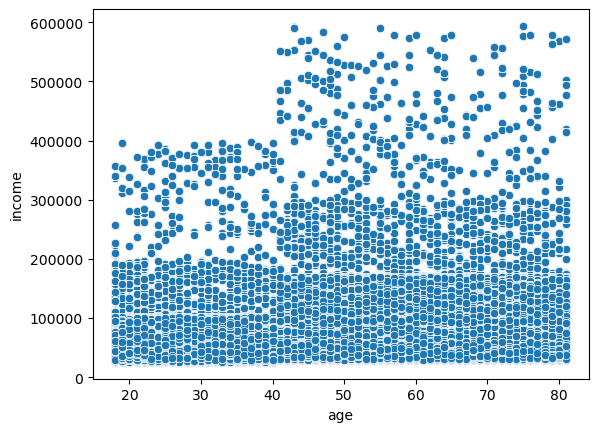

In [33]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

# Q8
## Exporting visualizations

In [40]:
bar_ords_week.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_ords_week.png'))

In [41]:
hist_prices.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_prices_31.01.png'))

In [42]:
scatterplot_prices.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_prices_31.01.png'))

In [43]:
line_chart_week_prices.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_chart_week_prices_31.01.png'))

In [44]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hour_of_day_31.01.png'))

In [47]:
barchart_loyalty_customers.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barchart_loyalty_customers_31.01.png'))

In [48]:
line_chart_age_dependants.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_chart_age_dependants_31.01.png'))


In [49]:
scatterplot_age_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_age_income_31.01.png'))

## New folder created under Analysis folder and exported all charts to it.